# Music Informatics Project Part 2 : Classification
From the feature files extracted in part 1 ,we perform our classification in this part.We use a KNN model and Gaussian Naive Bayes from sklearn as our classifier and compare the results.

In [1]:

import numpy as np, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import sklearn, pandas
import librosa, librosa.display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
import pickle


# Input root path:



In [2]:
#input data path
root_path='Z:/musicproject/Medley-data/'


In [3]:
#file suffix id for extracted  features files.The same filesuffix should be present in part1 as input
filesuffix='_final'

We first load the features list from saved files and then construct the input features matrix and labels.

In [4]:
#read features from saved files

test='test'
train='training'
validation='validation'
instrument=['clarinet','guitar','voice','flute','piano','voilin','trumpet']

#change 'classify' to choose from instruments to classify
classify=['clarinet','guitar','voice','flute','piano','voilin','trumpet']

#read features test set
dataset=test
features_test={}
for i in classify:  
  path=root_path+i+'/'+dataset+'/'
  with open(root_path+i+'_features_'+dataset+filesuffix, "rb") as fp: 
    # Unpickling
    b = pickle.load(fp)
    features_test[i]=b    
    
    
#read features train set  
dataset=train   
features_train={}
size={}
for i in classify:  
  path=root_path+i+'/'+dataset+'/'  
  with open(root_path+i+'_features_'+dataset+filesuffix, "rb") as fp:     
    # Unpickling
    b = pickle.load(fp)
    features_train[i]=b
    size[i]=len(b)  
      


Below we plot the training data set distribution .

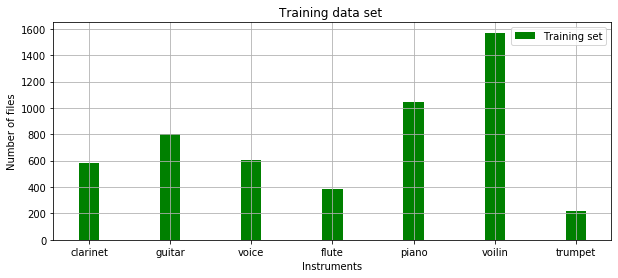

In [5]:
#plot trainin data 
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
x=size.keys()
ax.bar(x, size.values(),width = 0.25,align='center',color='g',label='Training set' )
plt.ylabel('Number of files')
plt.xlabel('Instruments')
plt.title('Training data set ')
plt.legend()
plt.grid(True)
plt.show()


Now we construct the test and train feature matrix.

In [6]:

######## construct training sets and labels####
####training set
featuresTrain=np.vstack(( features_train.values() ))
print('Shape of training features set' +str(featuresTrain.shape))


labelsTrain=[]
for l in features_train.keys():
  
  a=np.repeat(l ,len(features_train[l]) )
  labelsTrain = np.concatenate((labelsTrain,a  ))
  size

print('Shape of training labels' +str(labelsTrain.shape))


####test set
featuresTest=np.vstack(( features_test.values() ))
print('Shape of training features set' +str(featuresTest.shape))

labelsTest=[]
for l in features_test.keys():
  
  a=np.repeat(l ,len(features_test[l]) )
  labelsTest = np.concatenate((labelsTest,a  ))


print('Shape of test labels' +str(labelsTest.shape))


#encode test labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
yTrain=le.fit_transform(labelsTrain)
yTest=le.fit_transform(labelsTest)



Shape of training features set(5205, 44)
Shape of training labels(5205,)
Shape of training features set(700, 44)
Shape of test labels(700,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Training our models:

In [14]:
# KNN model
hist=[]
bestK=1
bestScore=0
bestTrain=0
for i in range(1,30):
  

  modelKNN2=KNeighborsClassifier(n_neighbors=i)
  modelKNN2.fit(featuresTrain, yTrain)
  score = modelKNN2.score(featuresTest, yTest)
  scoretrain = modelKNN2.score(featuresTrain, yTrain)
  if score> bestScore:
    bestScore=score
    bestK=i
    bestTrain=scoretrain
    
  a=(i,score)
  hist.append(a)
    
print('Best train score: ' +str(bestTrain) )
print('Best test score: '+str(bestScore) + " | Best K : "+str(bestK)  ) 


Best train score: 0.7104707012487992
Best test score: 0.41285714285714287 | Best K : 6


In [8]:
#Gaussian NB model
clf = GaussianNB()
clf.fit(featuresTrain, yTrain)
sc=clf.score(featuresTest, yTest)

sc2=clf.score(featuresTrain, yTrain)
print("train score "+str(sc2))
print("test score  "+str(sc))


train score 0.6464937560038425
test score  0.6057142857142858


In [9]:


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import seaborn as sns
from sklearn.metrics import classification_report


def plot_similarity(labels, features,dataset):
    
  
  features=features 
  sns.set(font_scale=1.2)  
  g = sns.heatmap(
      features,
      xticklabels=labels,
      yticklabels=labels,     
      cmap="YlOrRd",annot=True,fmt='g')
  g.set_xticklabels(labels )
  g.set_title("Confusion Matrix : "+dataset)
  plt.gcf().set_size_inches(8, 6)
  plt.show()
  

y_pred =clf.predict(featuresTest)
y_true = le.inverse_transform(yTest)
y_pred=le.inverse_transform(y_pred)




# Results 
Now we plot our classification report and confusion matrix for each model and data set.

# Gaussian NB model


Classification Report, Gaussian NB :Test Set
-------------------------------------------------------
              precision    recall  f1-score   support

    clarinet       0.64      0.39      0.48       100
      guitar       0.47      0.85      0.61       100
       voice       0.83      0.86      0.85       100
       flute       0.67      0.12      0.20       100
       piano       0.51      1.00      0.68       100
      voilin       0.59      0.37      0.45       100
     trumpet       0.81      0.65      0.72       100

    accuracy                           0.61       700
   macro avg       0.65      0.61      0.57       700
weighted avg       0.65      0.61      0.57       700



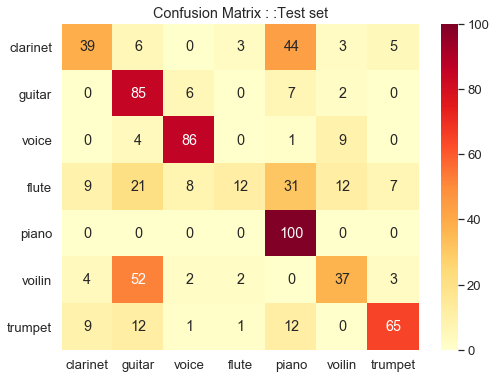


Classification Report ,Gaussian NB :Training Set
-------------------------------------------------------
              precision    recall  f1-score   support

    clarinet       0.68      0.45      0.54       579
      guitar       0.42      0.83      0.55       804
       voice       0.87      0.82      0.84       602
       flute       0.51      0.27      0.36       388
       piano       0.74      0.86      0.80      1041
      voilin       0.79      0.54      0.64      1570
     trumpet       0.55      0.50      0.52       221

    accuracy                           0.65      5205
   macro avg       0.65      0.61      0.61      5205
weighted avg       0.69      0.65      0.64      5205



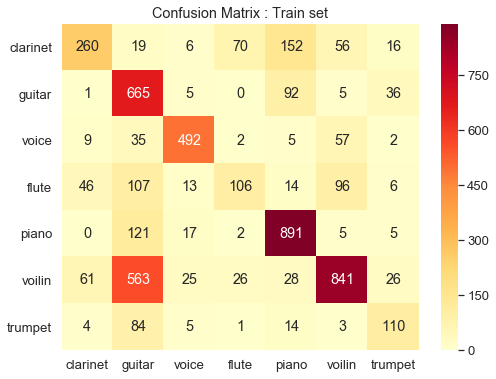

In [10]:

print()
print("Classification Report, Gaussian NB :Test Set")
print("-------------------------------------------------------")
report=classification_report(y_true, y_pred, labels=classify)
print(report)
cm=confusion_matrix(y_true, y_pred,labels=classify)
plot_similarity(classify, cm,':Test set')


y_predTrain =clf.predict(featuresTrain)
y_trueTrain = le.inverse_transform(yTrain)
y_predTrain=le.inverse_transform(y_predTrain)

print()
print("Classification Report ,Gaussian NB :Training Set")
print("-------------------------------------------------------")
print(classification_report(y_trueTrain, y_predTrain, labels=classify))

cmTrain=confusion_matrix(y_trueTrain, y_predTrain,labels=classify)

plot_similarity(classify, cmTrain,'Train set')


y_pred =modelKNN2.predict(featuresTest)
y_true = le.inverse_transform(yTest)
y_pred=le.inverse_transform(y_pred)

# KNN model


Classification Report ,KNN :Test Set
-------------------------------------------------------
              precision    recall  f1-score   support

    clarinet       0.30      0.25      0.27       100
      guitar       0.39      0.29      0.33       100
       voice       0.58      0.59      0.59       100
       flute       0.22      0.04      0.07       100
       piano       0.50      0.97      0.66       100
      voilin       0.28      0.58      0.37       100
     trumpet       0.16      0.03      0.05       100

    accuracy                           0.39       700
   macro avg       0.35      0.39      0.33       700
weighted avg       0.35      0.39      0.33       700



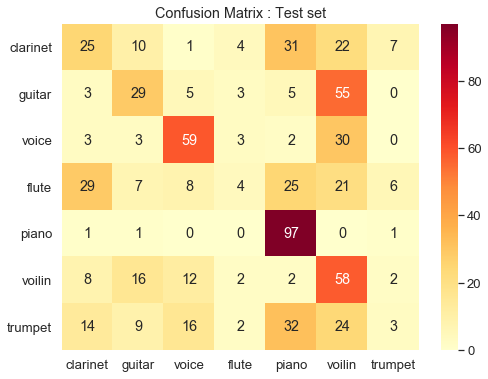


Classification Report ,KNN  :Training Set
-------------------------------------------------------
              precision    recall  f1-score   support

    clarinet       0.49      0.41      0.45       579
      guitar       0.58      0.55      0.56       804
       voice       0.74      0.73      0.74       602
       flute       0.47      0.16      0.24       388
       piano       0.67      0.83      0.74      1041
      voilin       0.60      0.71      0.65      1570
     trumpet       0.41      0.14      0.21       221

    accuracy                           0.61      5205
   macro avg       0.56      0.51      0.51      5205
weighted avg       0.60      0.61      0.59      5205



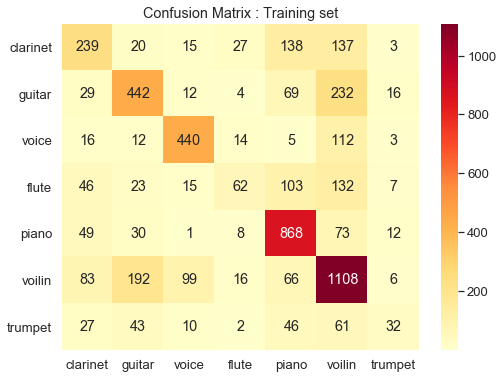

In [11]:

print()
print("Classification Report ,KNN :Test Set")
print("-------------------------------------------------------")
print(classification_report(y_true, y_pred, labels=classify))

cm=confusion_matrix(y_true, y_pred,labels=classify)

plot_similarity(classify, cm,'Test set')

y_predTrain =modelKNN2.predict(featuresTrain)
y_trueTrain = le.inverse_transform(yTrain)
y_predTrain=le.inverse_transform(y_predTrain)

print()
print("Classification Report ,KNN  :Training Set")
print("-------------------------------------------------------")
print(classification_report(y_trueTrain, y_predTrain, labels=classify))

cmTrain=confusion_matrix(y_trueTrain, y_predTrain,labels=classify)

plot_similarity(classify, cmTrain,'Training set')

# Discussions and Conclusion
We can observe from the overall results that Gaussian Naive Bayes performs better than the KNN in our case.Also there is different performace for every instrument.For example we see that piano has 100% recall rate in Gaussian NB,also in KNN it is 97% in our test set .Guitar and voice have better recall results compared to other instruments  .Also we can observe both models have different classification behaviour.For example for voilin the recall on Gaussian NB is only 37% percent however on KNN model it is 58%.
For our Gaussian model we get a overall training accuracy around 65% and test accuracy of 61%.The difference between the two accuracies is less which suggest that our model is not overfitted to training data.The next step that we can try to improve the accuracy is to increase the dataset ,as we do not have consistent data for each instrument.For example for voilin we have around 1500 training samples however trumpet has only around 200.
It was observed during the training that the accuracy results dropped down as the classes to classify increased.One reason that KNN results are worse than Gaussian NB is its limitations in multi class classification with high dimensions or features.For this purpose we can perform dimension reductions using Pricinpal Component Analysis or similar technique as next step.
It was also observed that we get better results for binary classification instead of multi class classification.TO investigate further different models classify different categories of instruments can be tried. 

# Reference


1.   Müller, Meinard. (2015). Fundamentals of Music Processing. 10.1007/978-3-319-21945-5. 
2.   Music Information Retrieval ,https://musicinformationretrieval.com/index.html

